# Estimating Vaccine Efficacy

You have probably read things like "the Moderna vaccine is 90% effective." What does that mean?
How is effectiveness estimated? Can the uncertainty of the estimate be quantified meaningfully? How?

Answering the question will involve many of the ideas and techniques we have seen, including inference in the presence of nuisance parameters.

Vaccine efficacy is defined as
\begin{equation*}
\mbox{VE} \equiv 1 - \frac{\mbox{risk among unvaccinated} - \mbox{risk among vaccinated}}{\mbox{risk among unvaccinated}}.
\end{equation*}
This is the naive estimate of the fraction of infections that vaccination prevents.

## Tests

We now consider testing vaccine efficacy. We start with a cartoon version of the problem, as follows:

We recruit $N$ subjects for the study. (They are not a random sample and thus
cannot be assumed to be representative of any larger group.)

None of the subjects has the disease when the trial starts. 
The vaccine is administered to $N_t$ of the subjects (the _treatment group_), selected at random; the remaining $N_c=N-N_t$ subjects (the _control group_) reveive a placebo.


(Why is administering a placebo important?)

All subjects are observed for the same period of time.
(In a real trial, different subjects are observed for different periods of time: subjects recruited early in the trial are generally observed longer than those recruited later, and some subjects are lost to followup.)

At the end of the observation period, $x_t$ of the vaccinated subjects and
$x_c$ of the unvaccinated subjects have contracted the disease.

The _incidence rate_ is $r_t := x_t/N_t$ among the vaccinated and $r_c := x_c/N_c$ among
the unvaccinated.
The _relative risk_ is $1-r_t/r_c$.
We assume that $r_t < r_c$: there is _prima facie_ evidence that the vaccine works.

### Complications in practice

In a real study, recruitment happens over a period of time, so not all subjects are "on trial" for the same amount of time. 
This is often addressed using methods from _survival analysis_.

In a real study, the randomization is typically _stratified_ and at least partially _balanced_. 
The randomization is stratified because subjects are generally recruited at a number of centers and the randomization to treatment or control is conducted independently at different centers.
The randomization might also be stratified by gender, age, or other covariates.
It is generally _balanced_ to ensuring that subgroups are assigned in roughly equal numbers to treatment and control.

Infections are observed only if they occur during the trial period, but not all infections during that period are necessarily observed.
Vaccination may affect behavior.

### Binomial responses

In one of the simplest stochastic response models, the probabiity that a given individual 
becomes infected is $p_c$ if the subject is not vaccinated and $p_t$ if the subject is vaccinated.
Whether different subjects become infected are independent events.
The assumption of independence would not be reasonable for a communicable disease if some subjects were in a position to infect each other, for instance, people who live or work or study together.
Modeling responses as if all subjects have the same two values of $p$, $p_c$ and $p_t$, might be unreasonable, too: individual differences might matter.
If this model holds, the number of vaccinated subjects who become infected has a Binomial distribution with parameters $n_t$ and $p_t$, and the number of unvaccinated subjects
who become infected has a Binomial distribution with parameters $n_c$ and $p_c$.
The "true" relative risk is $p_t/p_c$.
The "true" treatment effect could be defined to be $p_c-p_t$ or $p_c/p_t$ or the
"true" vaccine efficacy, $1-p_t/p_c$.

## Bayesian estimation of a binomial probability

### The beta-binomial distribution

The random variable $X$ has a beta-binomial distribution with parameters $n$, $\alpha$, and $\beta$ if $X \sim \mbox{Binom}(n, P)$ with $P \sim \mbox{Beta}(\alpha, \beta)$.

That is, the probability density of $P$ is
\begin{equation*}
f_P(p) = p^{\alpha-1}(1-p){\beta-1}/B(\alpha, \beta),
\end{equation*}
where $B(\cdot, \cdot)$ is the Beta function.
The probability mass function of $X$ is
\begin{equation*}
p_X(k) = \binom{n}{k} \frac{B(k+\alpha, n-k+\beta)}{B(\alpha, \beta)}.
\end{equation*}

The Beta distribution is _conjugate_ to the binomial.

### Connection to other distributions

There is a population of $N$ objects of which $G$ are labeled "1" and the rest are labeled "0."

If we sample with replacement $n$ times from this population, the distribution of the sample sum is binomial with parameters $n$ and $p=G/N$.
If we sample without replacement $n\le N$ times from this population, the distribution of the sample sum is hypergeometric with parameters $N$, $G$, and $n$.
If we sample from this population and each time we draw, we not only replace the item drawn but also put another item with the same value into the population, the sample sum is beta-binomial with parameters $n$, $\alpha = G$, and $\beta = N-G$.

In [2]:
import scipy as sp
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import math

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output, display, HTML

In [29]:
def plotBeta(alpha, beta, points=100):
    '''
    Plot the beta density function
    
    Parameters
    ----------
    alpha : float
        the alpha parameter of the beta distribution
    beta : float
        the alpha parameter of the beta distribution
        
    Returns
    -------
    no return value
    '''
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(stats.beta.ppf(0.01, alpha, beta),
                stats.beta.ppf(0.99, alpha, beta), points)
    lbl = 'beta pdf with parameters \alpha={} and \beta={}'.format(alpha,beta)
    ax.plot(x, stats.beta.pdf(x, alpha, beta), 'r-', lw=5, label=lbl)

In [35]:
interact(plotBeta, alpha=widgets.FloatSlider(value=1, min=0, max=10),\
                   beta=widgets.FloatSlider(value=1, min=0, max=10),\
                   points=fixed(100))

interactive(children=(FloatSlider(value=1.0, description='alpha', max=10.0), FloatSlider(value=1.0, descriptio…

<function __main__.plotBeta(alpha, beta, points=100)>

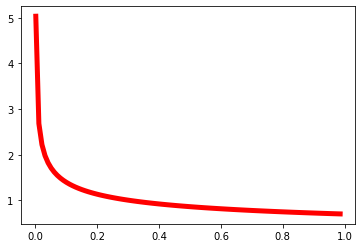

In [31]:
a, b = 0.700102, 1
plotBeta(a,b)

## A permutation approach

See [nuisance parameters](./nuisance.ipynb). [MORE TO COME]



### Critiquing the permutation approach

Assumes "non-interference." Any given subject's response depends only on that subject's assignment, not on the assignment of any other subject.
Might or might not be a good model, depending on how the subjects were recruited.

Does not account for clustering of cases, contact among subjects, etc.